# ⚙️ Models

You can see in this notebook 5 iterations :
* [Linear Regression with all features & with 3 features](#Linear-regression)
* [Dummy Regressor](#Dummy-Regressor)
* [Robust Scaler / Random Forest](#Random-Forest)
* [Standard Scaler / PCA / Linear Regression](#Standard-Scaler-/-PCA-/-Linear-Regression)

In [17]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

from mlxtend.plotting import plot_pca_correlation_graph

In [3]:
# load dataset
df = pd.read_csv('clean_df.csv')

# Linear regression 

<b>Iteration 1</b><br>
R2 score : 0.65

In [4]:
# linear regression with all features 
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print('Score:',score)

Coef: [-2.36152658e+04 -2.24409827e+04  1.13456916e+03 -5.21002168e+00
  7.32112572e+01 -4.64880688e+01  1.00138320e+02  3.88267682e+04
 -2.06548161e+04 -6.46384878e+04  1.33715886e+05 -2.92108912e+04
 -1.92116909e+04]
Intercept: -1973606.6175549019
Score: 0.6581129173352929


<b>Iteration 2</b><br>
R2 score : 0.54<br>
Features : median_income, place_<1H OCEAN, place_NEAR BAY

In [5]:
# linear regression with 3 most correlate features : median_income, place_<1H OCEAN, place_NEAR BAY
X = df[['median_income', 'place_<1H OCEAN', 'place_NEAR BAY']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print("R2={}".format(score))

Coef: [38407.94545134 53355.12686232 69920.49765726]
Intercept: 27063.808797314094
R2=0.530265335001395


# Dummy Regressor

<b>Iteration 3</b><br>
R2 score : 0.0

In [6]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

# Dummy
dummy_reg = DummyRegressor(strategy="mean")

# fit the modem
dummy_reg.fit(X_train, y_train)

# R2 
print("R2={}".format(dummy_reg.score(X_train, y_train)))

R2=0.0


# Random Forest

<b>Iteration 4</b><br>
R2 score : 0.76

In [7]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# standardizing the features (scaling)
X = RobustScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

rf = RandomForestRegressor(n_estimators=10, random_state=20)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# R2 
print("R2={}".format(rf.score(X_test,y_test)))

# MAE
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.752955133389519
Mean Absolute Error: 38726.56
Mean Absolute Percentage Error : 21.87 %.


# Standard Scaler / PCA / Linear Regression

<b>Iteration 5</b><br>
R2 score : 0.55

In [8]:
# define X & y
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [9]:
# standardizing the features (scaling)
X_std = StandardScaler().fit_transform(X)

In [10]:
# PCA without number of components for see all the explained variance ratio
pca = PCA()
pca_without = pca.fit(X_std).transform(X_std)
pca.explained_variance_ratio_

array([3.01848316e-01, 1.97183499e-01, 1.27022270e-01, 9.67243644e-02,
       8.24335222e-02, 7.65799073e-02, 5.45723726e-02, 4.42986418e-02,
       1.13019287e-02, 4.50006068e-03, 2.03487952e-03, 1.50023837e-03,
       3.88104078e-33])

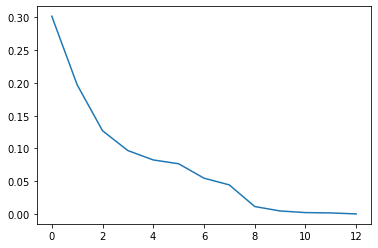

In [11]:
# plot explained variance
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [18]:
# PCA with 5 principal components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(data = principalComponents, 
                             columns = ['p1','p2','p3','p4','p5'])

In [19]:
# I keep 80% of my dataset with PCA
pca.explained_variance_ratio_.cumsum()

array([0.30184832, 0.49903181, 0.62605408, 0.72277845, 0.80521197])

In [20]:
# PCA with 5 principal components in dataframe
pca_df

,p1,p2,p3,p4,p5
0,-0.133750,1.191063,-2.292902,-0.488145,-0.122741
1,-0.067442,-1.967205,0.181470,-0.713308,-2.000137
2,-1.429434,1.025240,-1.854934,-0.379824,0.451070
3,-1.346855,-1.650927,-0.109072,-0.628647,0.974136
4,-0.713884,1.622817,-1.280269,-0.480297,-0.750879
...,...,...,...,...,...
16507,-1.355587,2.234550,-1.385134,-0.646579,-0.600386
16508,-1.173451,2.431406,2.242647,0.216594,1.496426
16509,-0.384370,1.965730,-1.192283,-0.556355,-1.020626
16510,1.187258,-1.314160,0.537180,-0.482848,1.368276


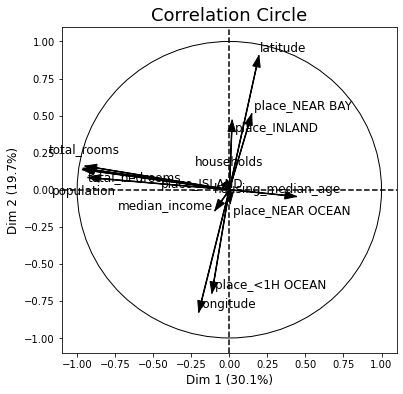

In [21]:
# correlation circle
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'place_<1H OCEAN', 'place_INLAND', 'place_ISLAND', 'place_NEAR BAY', 'place_NEAR OCEAN']
figure, correlation_matrix = plot_pca_correlation_graph(X_std,
                                                        features,
                                                        dimensions=(1,2),
                                                        figure_axis_size=6)

In [22]:
# concatenate pca_df with target
final_df = pd.concat([pca_df, df[['median_house_value']]], axis = 1)

In [23]:
final_df

,p1,p2,p3,p4,p5,median_house_value
0,-0.133750,1.191063,-2.292902,-0.488145,-0.122741,72000.0
1,-0.067442,-1.967205,0.181470,-0.713308,-2.000137,274100.0
2,-1.429434,1.025240,-1.854934,-0.379824,0.451070,58300.0
3,-1.346855,-1.650927,-0.109072,-0.628647,0.974136,200000.0
4,-0.713884,1.622817,-1.280269,-0.480297,-0.750879,117900.0
...,...,...,...,...,...,...
16507,-1.355587,2.234550,-1.385134,-0.646579,-0.600386,93800.0
16508,-1.173451,2.431406,2.242647,0.216594,1.496426,103100.0
16509,-0.384370,1.965730,-1.192283,-0.556355,-1.020626,192600.0
16510,1.187258,-1.314160,0.537180,-0.482848,1.368276,153500.0


In [24]:
# linear regression
# define X & y
X = final_df.drop(['median_house_value'], axis=1)
y = final_df['median_house_value'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print("R2={}".format(score))

Coef: [  3810.69029568 -14017.02152159  51604.64571104  11786.05016526
 -46707.59706203]
Intercept: 206910.53715560443
R2=0.557179984808645
